In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import scipy
import warnings 
warnings.filterwarnings("ignore")

In [30]:
data = pd.read_csv("Dataset/processed_data.csv")

### RFM Analysis

Recency, Frequency, Monetary Value (RFM) analysis method is a method of customer analysis and segmentation based on customer habits. The variables used to perform RFM analysis are:

- Recency: How recently the customer made a transaction.
- Frequency: How often customers make transactions
- Monetary: How many transactions the customer has made

1. Recency: The difference between the last day the customer made a transaction and the day he did the analysis. In this case, the day of analysis uses the data of the last day of the transaction.
2. Frequency: The number of transactions made by customers 
3. Monetary: Total order amount issued by customers 

***Here are the steps in creating an RFM model:***

* Calculate RFM Value
* Calculate RFM Score
* Calculate the total RFM score
* Labeling

#### RFM Value

Receny Value

In [31]:
rfm_table1 = pd.DataFrame(data['CustomerID'].unique())
rfm_table1.columns = ['CustomerID']
rfm_table1.head()

,CustomerID
0,15974.0
1,15632.0
2,15406.0
3,14495.0
4,14499.0


In [32]:
# the latest purchase for every customer
latest_purchase = data.groupby('CustomerID').InvoiceDate.max().reset_index()
latest_purchase.columns = ['CustomerID','LatestPurchaseDate']

In [33]:
latest_purchase['LatestPurchaseDate'] = pd.to_datetime(latest_purchase['LatestPurchaseDate'])

In [34]:
# Calculate Recency
# Recency = point in time of observation - number of days last purchase
latest_purchase['Recency'] = (latest_purchase['LatestPurchaseDate'].max() - latest_purchase['LatestPurchaseDate']).dt.days
latest_purchase.head()

,CustomerID,LatestPurchaseDate,Recency
0,12347.0,2011-12-07 15:52:00,1
1,12349.0,2011-11-21 09:51:00,18
2,12350.0,2011-02-02 16:01:00,309
3,12352.0,2011-11-03 14:37:00,35
4,12354.0,2011-04-21 13:11:00,231


In [35]:
latest_purchase.head()

,CustomerID,LatestPurchaseDate,Recency
0,12347.0,2011-12-07 15:52:00,1
1,12349.0,2011-11-21 09:51:00,18
2,12350.0,2011-02-02 16:01:00,309
3,12352.0,2011-11-03 14:37:00,35
4,12354.0,2011-04-21 13:11:00,231


In [36]:
rfm_table1 = pd.merge(rfm_table1, latest_purchase[['CustomerID','Recency']], on='CustomerID')
rfm_table1.head()

,CustomerID,Recency
0,15974.0,38
1,15632.0,15
2,15406.0,30
3,14495.0,50
4,14499.0,25


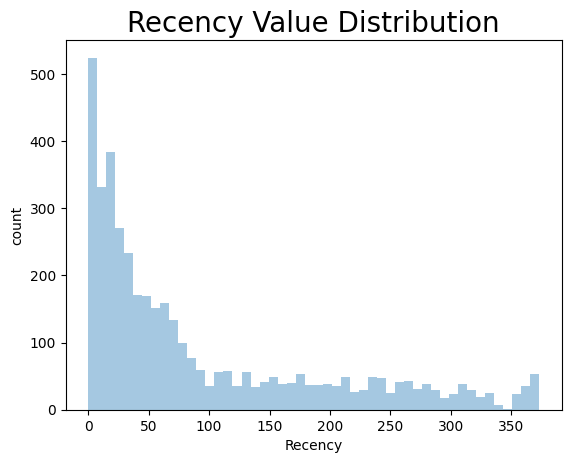

In [37]:
# Recency value distribution
sns.distplot(rfm_table1['Recency'], kde=False, bins=50)
plt.title('Recency Value Distribution', fontsize = 20)
plt.xlabel('Recency')
plt.ylabel('count');

#### Frequency

In [38]:
# Calculate Frequency
frequency = data.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','frequency']
frequency.head()

,CustomerID,frequency
0,12347.0,47
1,12349.0,19
2,12350.0,6
3,12352.0,31
4,12354.0,13


In [39]:
rfm_table1 = pd.merge(rfm_table1,frequency, on='CustomerID')
rfm_table1

,CustomerID,Recency,frequency
0,15974.0,38,55
1,15632.0,15,56
2,15406.0,30,19
3,14495.0,50,2
4,14499.0,25,67
...,...,...,...
4081,14477.0,50,1
4082,13260.0,60,1
4083,17879.0,173,1
4084,14785.0,14,1


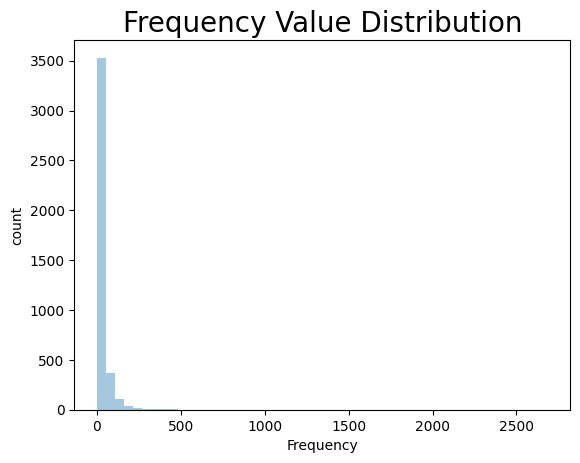

In [40]:
# Frequency Value Distribution
sns.distplot(rfm_table1['frequency'], kde=False, bins=50)
plt.title('Frequency Value Distribution', fontsize = 20)
plt.xlabel('Frequency')
plt.ylabel('count');

#### Monetary

In [41]:
# Calculate Monetary
monetary = data.groupby('CustomerID').Revenue.sum().reset_index()
monetary.columns = ['CustomerID','monetary']
monetary.head()

,CustomerID,monetary
0,12347.0,971.65
1,12349.0,352.78
2,12350.0,125.40
3,12352.0,513.66
4,12354.0,202.60


In [42]:
rfm_table1 = pd.merge(rfm_table1, monetary, on='CustomerID')
rfm_table1.head()

,CustomerID,Recency,frequency,monetary
0,15974.0,38,55,944.43
1,15632.0,15,56,1126.55
2,15406.0,30,19,120.69
3,14495.0,50,2,41.60
4,14499.0,25,67,280.39


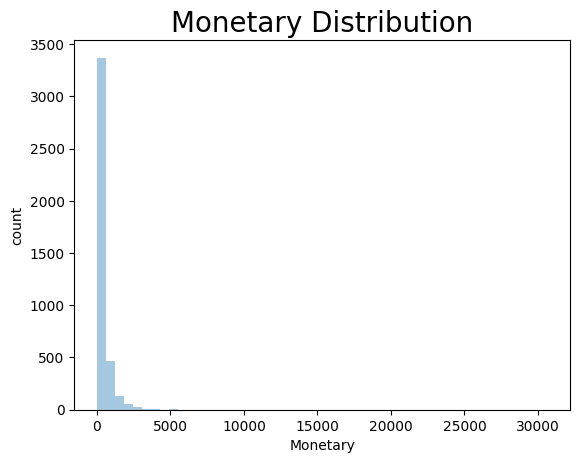

In [43]:
# Monetary Value Distribution
sns.distplot(rfm_table1['monetary'], kde=False, bins=50)
plt.title('Monetary Distribution', fontsize = 20)
plt.xlabel('Monetary')
plt.ylabel('count');

#### 2. RFM Score

- The calculation of the individual RFM Score can be done using the Quartile statistical method (dividing the Score into four parts).

The steps is:

1. Split the metrics into segments using quantiles.
2. We assign a score from 1 to 4 to Recency, Frequency and Monetary.
3. Four is the best/highest value, and one is the lowest/worst value.

In [44]:
quartiles = rfm_table1.quantile(q=[0.25, 0.5, 0.75])
quartiles

,CustomerID,Recency,frequency,monetary
0.25,13808.25,17.0,6.0,79.235
0.50,15288.50,51.0,14.0,178.955
0.75,16765.50,148.0,33.0,430.510


In [45]:
segmented_rfm1 = rfm_table1.copy()

In [46]:
def recency_score (data):
    if data <= 15:
        return 4
    elif data <= 47:
        return 3
    elif data <= 135:
        return 2
    else:
        return 1

def frequency_score (data):
    if data <= 16:
        return 1
    elif data <= 38:
        return 2
    elif data <= 87:
        return 3
    else:
        return 4
def monetary_value_score (data):
    if data <= 219.9525:
        return 1
    elif data <= 489.5500:
        return 2
    elif data <= 1183.5400:
        return 3
    else:
        return 4

segmented_rfm1['R'] = segmented_rfm1['Recency'].apply(recency_score )
segmented_rfm1['F'] = segmented_rfm1['frequency'].apply(frequency_score)
segmented_rfm1['M'] = segmented_rfm1['monetary'].apply(monetary_value_score)
segmented_rfm1.head()

,CustomerID,Recency,frequency,monetary,R,F,M
0,15974.0,38,55,944.43,3,3,3
1,15632.0,15,56,1126.55,4,3,3
2,15406.0,30,19,120.69,3,2,1
3,14495.0,50,2,41.60,2,1,1
4,14499.0,25,67,280.39,3,3,2


- Best Recency score = 4: purchased very recently.
- Best Frequency score = 4: highest quantity purchases.
- Best Monetary score = 4: spent the most.

#### 3.Total RFM Score

In [47]:
segmented_rfm1['RFM_score'] =segmented_rfm1[['R', 'F', 'M']].sum(axis=1)

,CustomerID,Recency,frequency,monetary,R,F,M,RFM_score
0,15974.0,38,55,944.43,3,3,3,9
1,15632.0,15,56,1126.55,4,3,3,10
2,15406.0,30,19,120.69,3,2,1,6
3,14495.0,50,2,41.60,2,1,1,4
4,14499.0,25,67,280.39,3,3,2,8


In [49]:
segmented_rfm1['RFM_Segment'] = segmented_rfm1.R.map(str)+segmented_rfm1.F.map(str)+segmented_rfm1.M.map(str)
segmented_rfm1.head()

,CustomerID,Recency,frequency,monetary,R,F,M,RFM_score,RFM_Segment
0,15974.0,38,55,944.43,3,3,3,9,333
1,15632.0,15,56,1126.55,4,3,3,10,433
2,15406.0,30,19,120.69,3,2,1,6,321
3,14495.0,50,2,41.60,2,1,1,4,211
4,14499.0,25,67,280.39,3,3,2,8,332


#### 4. Labelling

In [50]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm1)

for i in range(0,len(segmented_rfm1)):

    if segmented_rfm1['RFM_Segment'][i] == '444':
        label[i] = "Best Customers"
        
    elif segmented_rfm1['RFM_Segment'][i] == '334'or segmented_rfm1['RFM_Segment'][i] == '441'or segmented_rfm1['RFM_Segment'][i] == '442'or segmented_rfm1['RFM_Segment'][i] == '244'or segmented_rfm1['RFM_Segment'][i] == '343'or segmented_rfm1['RFM_Segment'][i] == '344'or segmented_rfm1['RFM_Segment'][i] == '433'or segmented_rfm1['RFM_Segment'][i] == '434'or segmented_rfm1['RFM_Segment'][i] == '443':
        label[i] = "Loyal Custumers"
        
    elif segmented_rfm1['RFM_Segment'][i] == '311'or segmented_rfm1['RFM_Segment'][i] == '324'or segmented_rfm1['RFM_Segment'][i] == '341'or segmented_rfm1['RFM_Segment'][i] == '342'or segmented_rfm1['RFM_Segment'][i] == '314'or segmented_rfm1['RFM_Segment'][i] == '414'or segmented_rfm1['RFM_Segment'][i] == '424'or segmented_rfm1['RFM_Segment'][i] == '312' or segmented_rfm1['RFM_Segment'][i] == '313' or segmented_rfm1['RFM_Segment'][i] == '321'or segmented_rfm1['RFM_Segment'][i] == '322'or segmented_rfm1['RFM_Segment'][i] == '323'or segmented_rfm1['RFM_Segment'][i] == '331'or segmented_rfm1['RFM_Segment'][i] == '332'or segmented_rfm1['RFM_Segment'][i] == '333'or segmented_rfm1['RFM_Segment'][i] == '411'or segmented_rfm1['RFM_Segment'][i] == '412'or segmented_rfm1['RFM_Segment'][i] == '413'or segmented_rfm1['RFM_Segment'][i] == '421'or segmented_rfm1['RFM_Segment'][i] == '422'or segmented_rfm1['RFM_Segment'][i] == '423'or segmented_rfm1['RFM_Segment'][i] == '431'or segmented_rfm1['RFM_Segment'][i] == '432':
        label[i] = "Potential Costumers"

    elif segmented_rfm1['RFM_Segment'][i] == '222'or segmented_rfm1['RFM_Segment'][i] == '223'or segmented_rfm1['RFM_Segment'][i] == '232'or segmented_rfm1['RFM_Segment'][i] == '233'or segmented_rfm1['RFM_Segment'][i] == '113'or segmented_rfm1['RFM_Segment'][i] == '114'or segmented_rfm1['RFM_Segment'][i] == '131'or segmented_rfm1['RFM_Segment'][i] == '141'or segmented_rfm1['RFM_Segment'][i] == '213'or segmented_rfm1['RFM_Segment'][i] == '214'or segmented_rfm1['RFM_Segment'][i] == '231'or segmented_rfm1['RFM_Segment'][i] == '214'or segmented_rfm1['RFM_Segment'][i] == '231'or segmented_rfm1['RFM_Segment'][i] == '241'or segmented_rfm1['RFM_Segment'][i] == '243':
        label[i] = "Customers Needing Attention"
    
    elif segmented_rfm1['RFM_Segment'][i] == '144'or segmented_rfm1['RFM_Segment'][i] == '244'or segmented_rfm1['RFM_Segment'][i] == '143'or segmented_rfm1['RFM_Segment'][i] == '134':
        label[i] = "Cant' Lose Them"

    elif segmented_rfm1['RFM_Segment'][i] == '121'or segmented_rfm1['RFM_Segment'][i] == '122'or segmented_rfm1['RFM_Segment'][i] == '112'or segmented_rfm1['RFM_Segment'][i] == '212'or segmented_rfm1['RFM_Segment'][i] == '211'or segmented_rfm1['RFM_Segment'][i] == '221'or segmented_rfm1['RFM_Segment'][i] == '222'or segmented_rfm1['RFM_Segment'][i] == '123'or segmented_rfm1['RFM_Segment'][i] == '124'or segmented_rfm1['RFM_Segment'][i] == '132'or segmented_rfm1['RFM_Segment'][i] == '133'or segmented_rfm1['RFM_Segment'][i] == '134'or segmented_rfm1['RFM_Segment'][i] == '142'or segmented_rfm1['RFM_Segment'][i] == '224'or segmented_rfm1['RFM_Segment'][i] == '242':
        label[i] = "At Risk Customers"

    elif segmented_rfm1['RFM_Segment'][i] == '111':
        label[i] = "Lost Customers"
        
    else:
        label[i] = "Others"

In [51]:
segmented_rfm1['label'] = label
segmented_rfm1

,CustomerID,Recency,frequency,monetary,R,F,M,RFM_score,RFM_Segment,label
0,15974.0,38,55,944.43,3,3,3,9,333,Potential Costumers
1,15632.0,15,56,1126.55,4,3,3,10,433,Loyal Custumers
2,15406.0,30,19,120.69,3,2,1,6,321,Potential Costumers
3,14495.0,50,2,41.60,2,1,1,4,211,At Risk Customers
4,14499.0,25,67,280.39,3,3,2,8,332,Potential Costumers
...,...,...,...,...,...,...,...,...,...,...
4081,14477.0,50,1,41.60,2,1,1,4,211,At Risk Customers
4082,13260.0,60,1,19.80,2,1,1,4,211,At Risk Customers
4083,17879.0,173,1,129.36,1,1,1,3,111,Lost Customers
4084,14785.0,14,1,9.48,4,1,1,6,411,Potential Costumers
